In [1]:
!nvidia-smi

Sun Oct  2 14:59:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Install prerequisite
Note: **restart runtime** after running the following cell

In [ ]:
!pip install -q torch==1.7.1+cu110 torchvision==0.8.2+cu110 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv-full==1.2.7 -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.7.0/index.html

# Install mmdetection

In [1]:
%cd /content
!rm -r mmdetection
!git clone -q https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!git checkout dbc6b67446d3898461d0a5d5cef7d112e710db0a
!pip install -q -r requirements/build.txt
!pip install -q -e .

/content
rm: cannot remove 'mmdetection': No such file or directory
/content/mmdetection
Note: checking out 'dbc6b67446d3898461d0a5d5cef7d112e710db0a'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at dbc6b674 Add FAQ (#4742)


# Download needed files

In [2]:
%cd /content
!cp /content/drive/MyDrive/TableStructureWeights/* .

/content


In [ ]:
%cd /content
!gdown 1wLbbjAFpNkqXo7pU9hJD858WNNELRt3Q
!gdown 1Pxb6Jm4E8Y_Ut7eI76Z7qnRBLpA5rjN3
!gdown 1u2vpBk9dhn0NVWMzHSw1g8OjG4sizXMk
!gdown 1mfzrot6d8NcE7bOhXKVdSpjWyi3SpG35
!gdown 1eLegtm5hD_FVGvAiTf0I9J2yz2LT_ffj
!gdown 1fwMlBzLSN9s28fke1hiPLydvGNsiR03-

In [3]:
!cp /content/coco.py /content/mmdetection/mmdet/datasets/coco.py
!cp /content/class_names.py /content/mmdetection/mmdet/core/evaluation/class_names.py

In [4]:
!mkdir images && unzip -q demo_images.zip -d images

In [1]:
%cd /content/mmdetection
from mmdet.apis import init_detector, inference_detector

# Specify the path to model config and checkpoint file
config_file = '/content/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file_detection = '/content/Table_Detection.pth'
checkpoint_file_recognition = '/content/Table_Cell_Recognition.pth'

# build the model from a config file and a checkpoint file
model_det = init_detector(config_file, checkpoint_file_detection, device='cuda:0')
model_rec = init_detector(config_file, checkpoint_file_recognition, device='cuda:0')

/content/mmdetection


/content/mmdetection/mmdet/models/builder.py:72: UserWarning: train_cfg and test_cfg is deprecated, please specify them in model
  'please specify them in model', UserWarning)


Use load_from_local loader
Use load_from_local loader


In [30]:
import cv2
import matplotlib.pyplot as plt

def inference(filepath):
    result_det = inference_detector(model_det, filepath)
    
    original_image = cv2.imread(filepath)
    vis_image = original_image.copy()

    for bb in result_det[0][0]:
        if bb[4] >= 0.7:
            min_x = int(bb[0])
            min_y = int(bb[1])
            max_x = int(bb[2])
            max_y = int(bb[3])
            cv2.rectangle(vis_image, (min_x, min_y), (max_x, max_y), (0, 255, 0), 4)

            segment = original_image[min_y: max_y, min_x: max_x]
            result_rec = inference_detector(model_rec, segment)
            for cell in result_rec[0][0]:
                if cell[4] >= 0.5:
                    c_min_x = min_x + int(cell[0])
                    c_min_y = min_y + int(cell[1])
                    c_max_x = min_x + int(cell[2])
                    c_max_y = min_y + int(cell[3])
                    cv2.rectangle(vis_image, (c_min_x, c_min_y), (c_max_x, c_max_y), (255, 0, 0), 2)
    fig, ax = plt.subplots(1, 2, figsize=(25, 25))
    ax[0].imshow(original_image[:,:,::-1])
    ax[1].imshow(vis_image[:,:,::-1])

/content


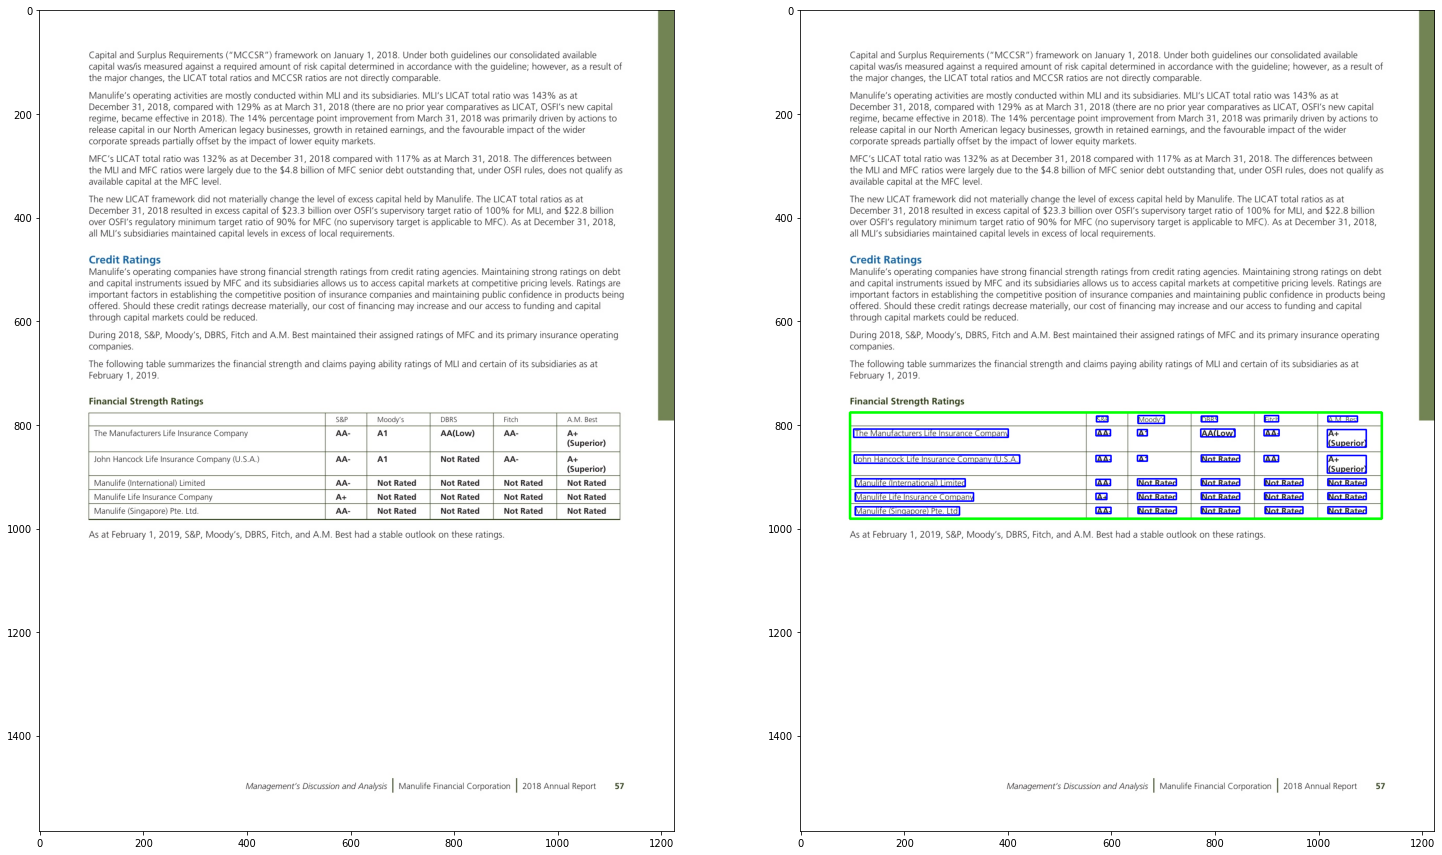

In [31]:
%cd /content
inference('images/demo1.jpg')

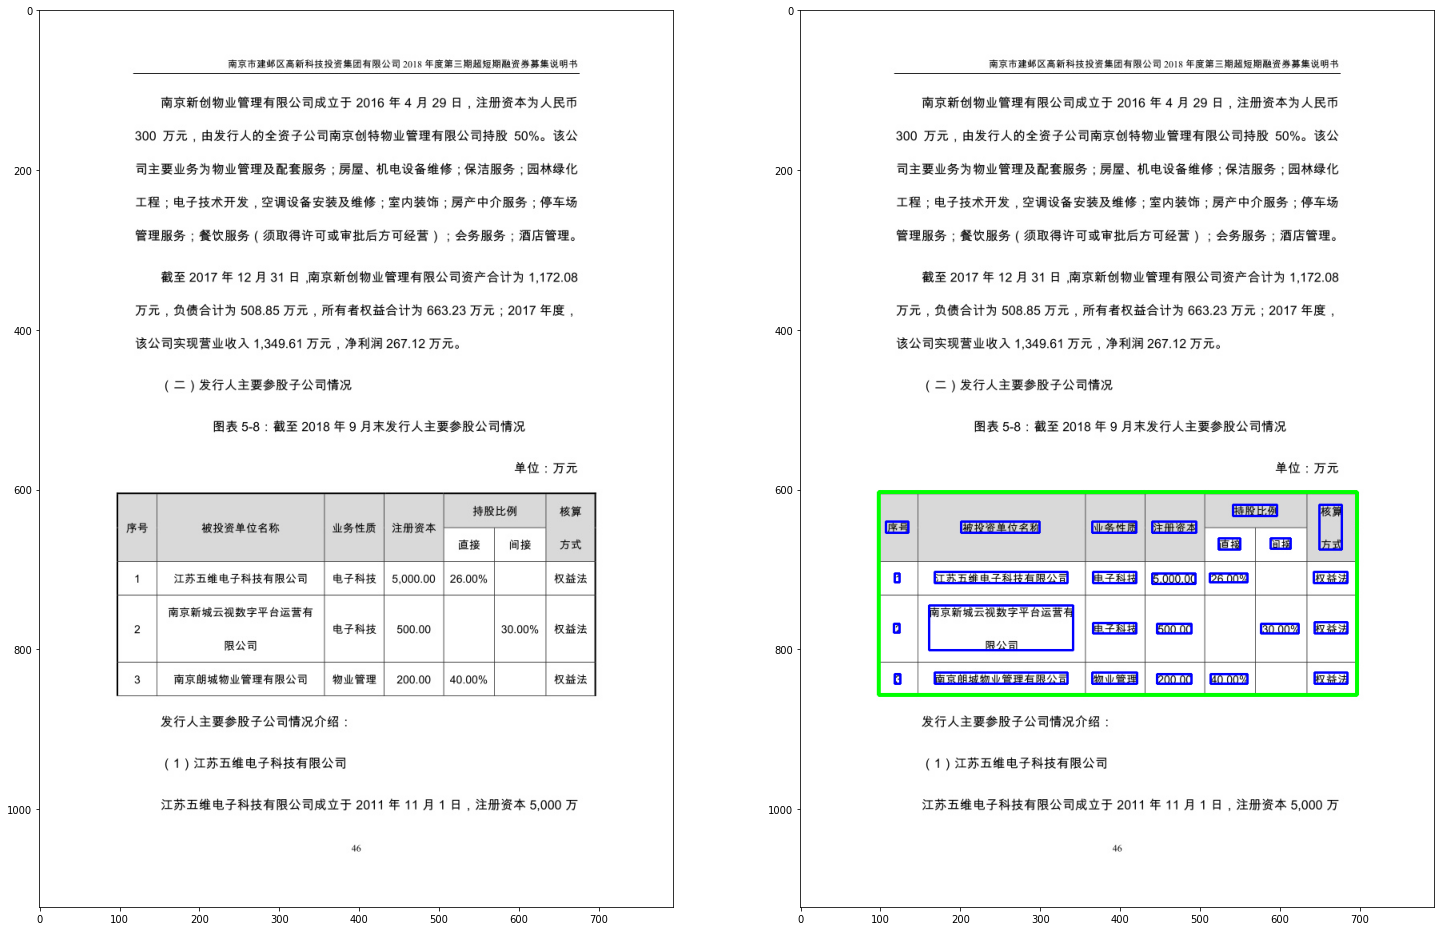

In [32]:
inference('images/demo2.jpg')

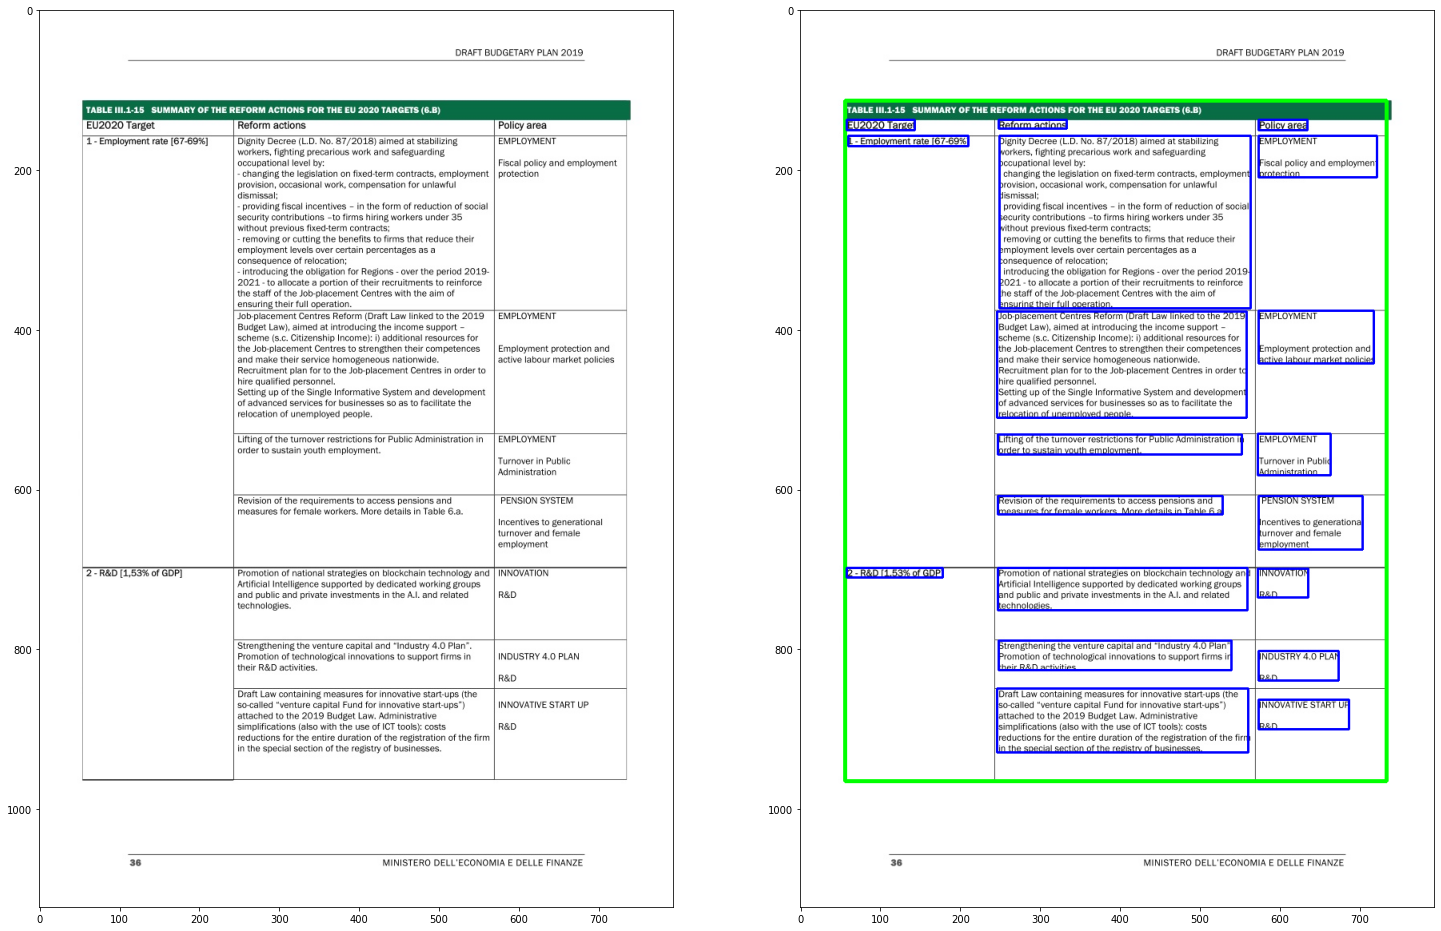

In [33]:
inference('images/demo3.jpg')

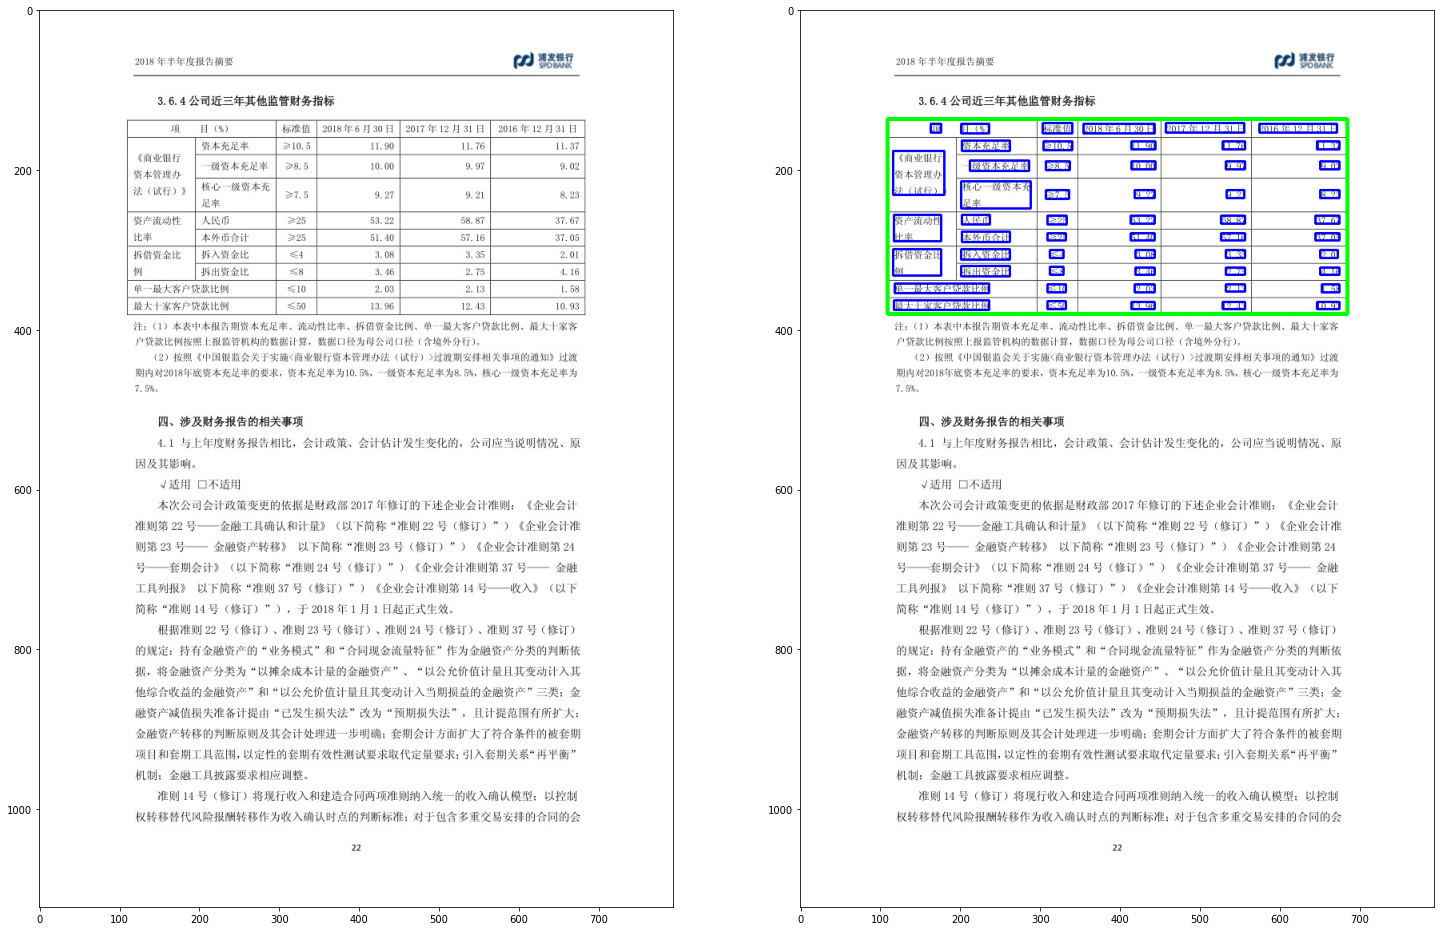

In [34]:
inference('images/demo4_mal.jpg')

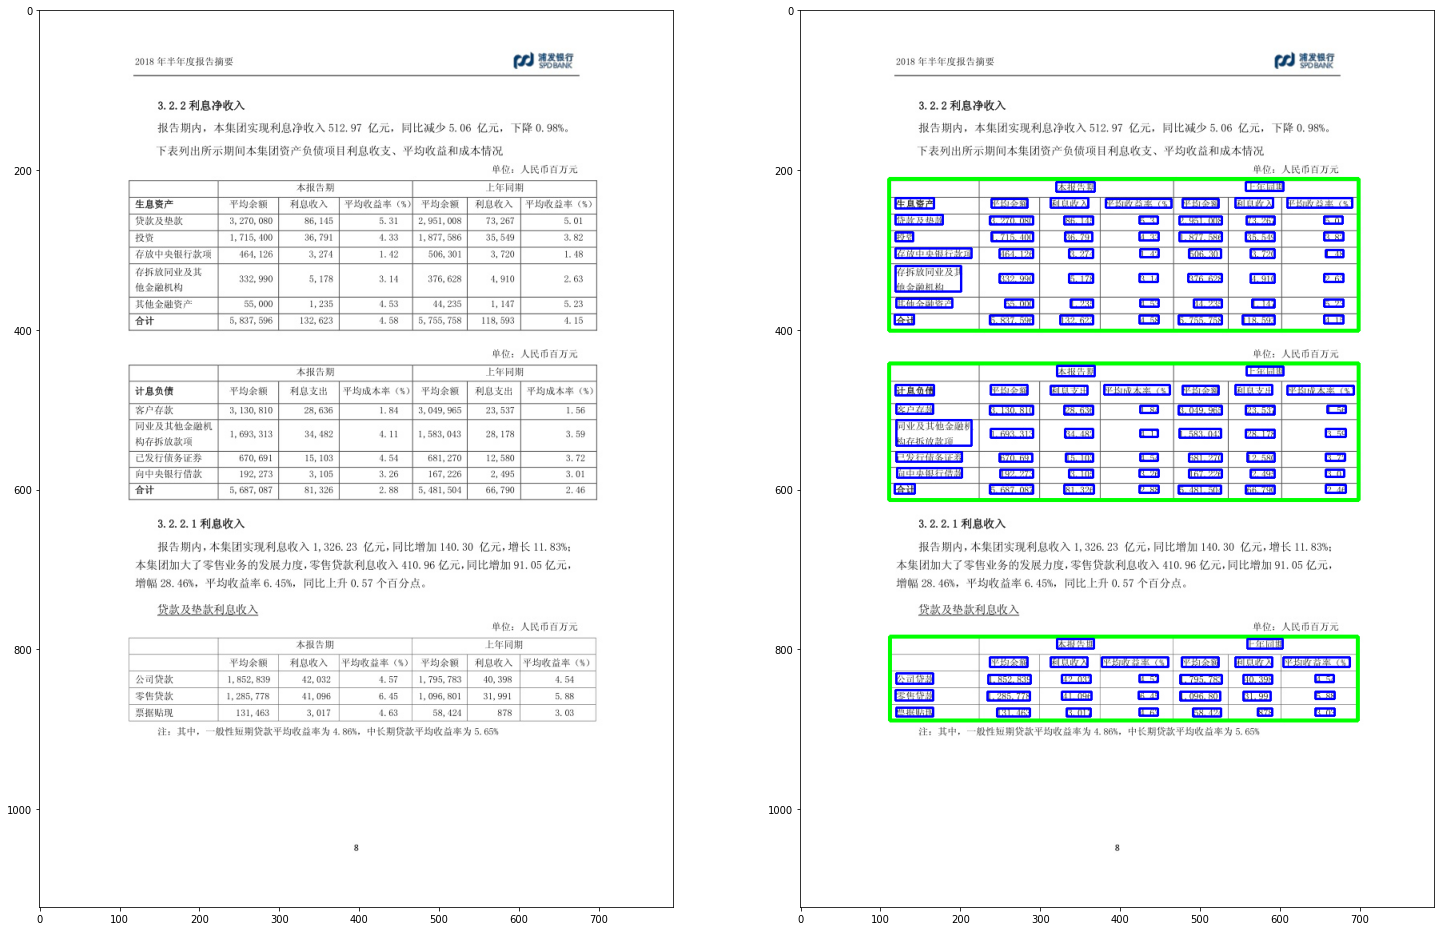

In [35]:
inference('images/demo5.jpg')

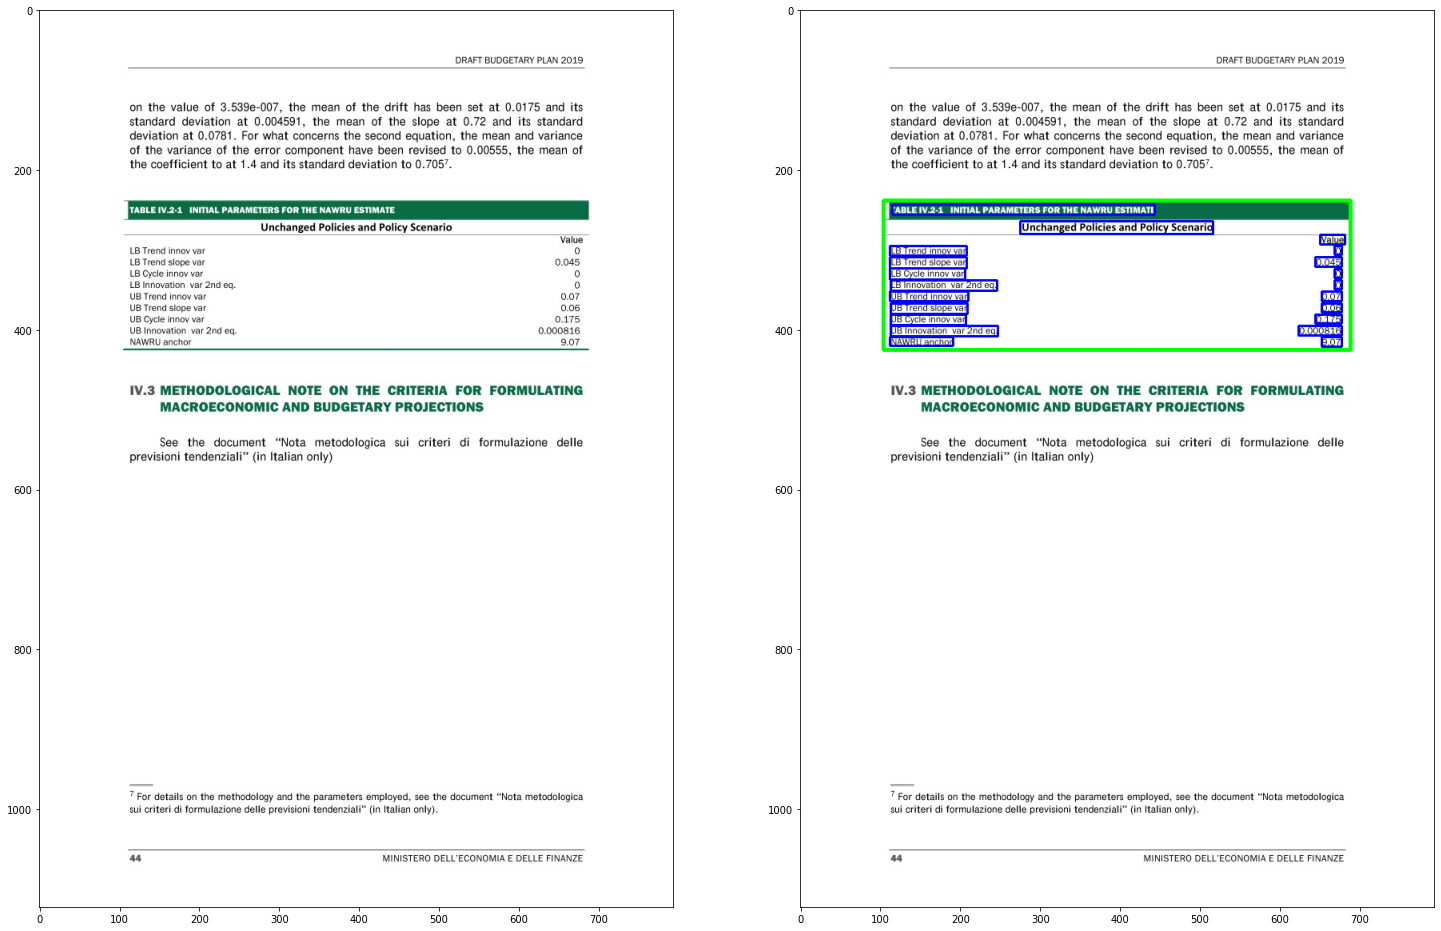

In [36]:
inference('images/demo6.jpg')

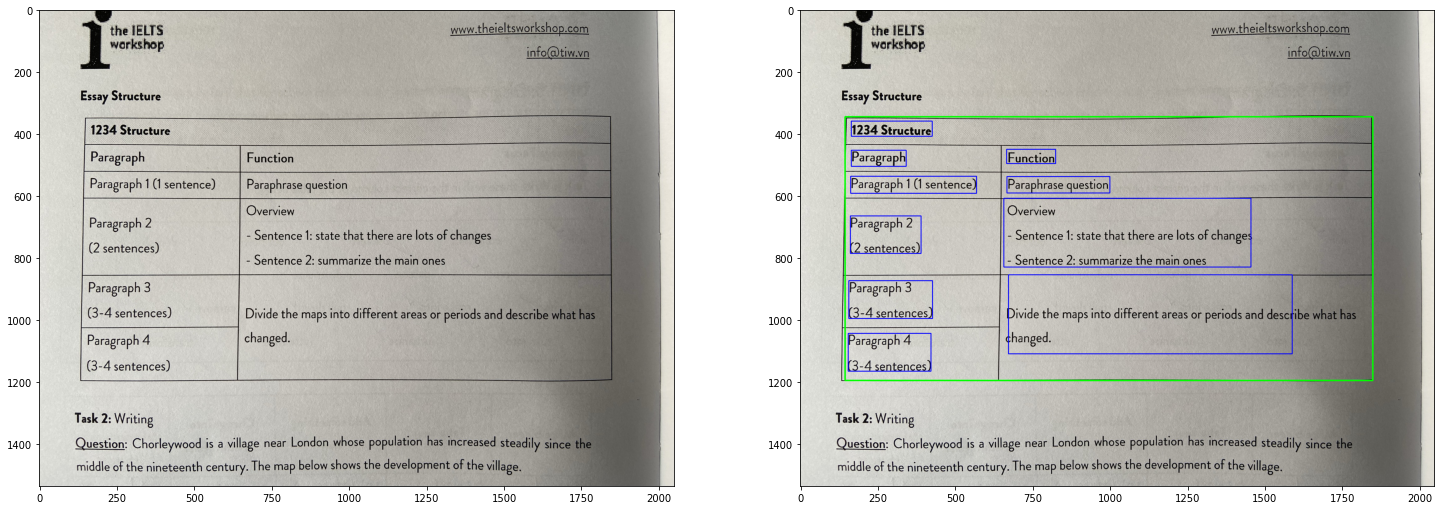

In [37]:
inference('images/demo_dirty.jpeg')